
# CM50266 Applied Data Science

## Lab 2



In [15]:
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 5.4 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## !!! Run the above cell if you plan on running this notebook locally on your system !!!

### This cell downloads `spacy`, a python library that is very useful for NLP processing.

You might have to restart the kernel after executing the above cell, to make sure that the updated version of the libraries are being used

# **_TASK 1_**

# **Importing all packages**

### This cell has most of the libraries and dependencies used in this lab notebook. 

### It also includes `nltk.download('stopwords')`, which is a command that downloads all the stopwords from the `nltk` library

In [17]:
import pandas as pd
import numpy as np
np.set_printoptions(threshold=100000)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import nltk
import itertools
from pprint import pprint

nltk.download('stopwords')
import re
import spacy
import string
from wordcloud import WordCloud
import time

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Loading the dataset into a Data Frame using pandas
dataset = pd.read_csv('car_reviews.csv')

In [19]:
# Viewing a part of our dataset to see how the dataset looks
dataset.head(10)

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
5,Neg,The Ford Winstar is a car that I would not re...
6,Neg,We bought this van in 1999 after having been...
7,Neg,I bought the Focus wagon for it s cargo space...
8,Neg,You ve probably heard about the giant 2000 Fo...
9,Neg,If you thought that the GMC Chevrolet Suburba...


In [20]:
'''
Viewing types of data in each column of the dataset, and if there are any null values. 
As evident below, there are no null values in our dataset
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  1382 non-null   object
 1   Review     1382 non-null   object
dtypes: object(2)
memory usage: 21.7+ KB


In [21]:
# Storing the stop words and punctuations into variables for future use in text preprocessing

stop_words = nltk.corpus.stopwords.words('english')
punctuations = string.punctuation

# WordClouds

### Here, I have created a wordcloud, which enables us to see all the top words present in the dataset in a visually attractive manner. I have created two wordclouyds, one for all the Positive Reviews and one for all the negative reviews

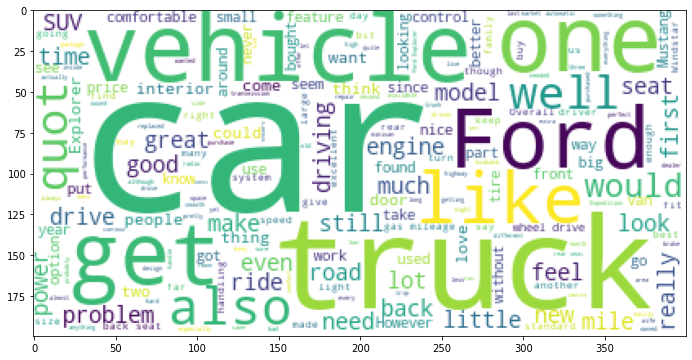

In [22]:
# Wordcloud showing all the common words present in Postitve Reviews

plt.figure(figsize=(12,6))
text = ' '.join(dataset[dataset['Sentiment']=='Pos']['Review'])
wc = WordCloud(background_color='white',stopwords=stop_words).generate(text)
plt.imshow(wc)

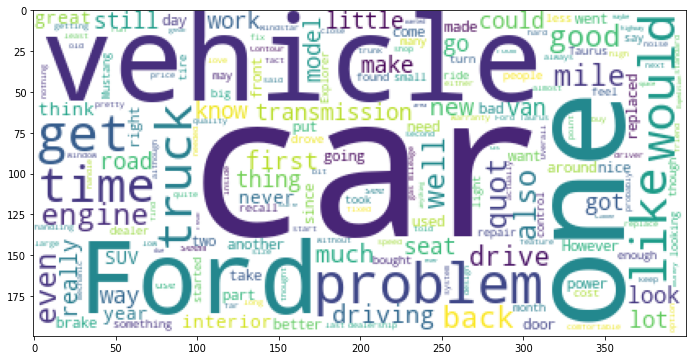

In [23]:
# Wordcloud showing all the common words present in Negative Reviews

plt.figure(figsize=(12,6))
text = ' '.join(dataset[dataset['Sentiment']=='Neg']['Review'])
wc = WordCloud(background_color='white',stopwords=stop_words).generate(text)
plt.imshow(wc)

In [24]:
'''
Loading the spacy language model. This is a pretrained model, which can be used for various text processing and 
NLP pipelines
'''

nlp = spacy.load("en_core_web_sm")

In [25]:
def clean_text(sent):
    '''
    This function cleans the text passed to it, such that it removes all characters 
    that are not an alphabet or a space

    Input: Initial text
    Output: Text with only alphabets and spaces
    '''
    pattern=r'[^a-zA-z\s]'
    sent=re.sub(pattern,'',sent)
    return sent


In [26]:
# Creating a new column in the dataframe which cleans the Reviews using the above created function

dataset['Clean text']=dataset['Review'].apply(clean_text)

# **Main Text Preprocessing**

### This cell handles the main text preprocessing as specified in the lab requirements. The following have been done:
- All words are split into tokens
- Each token is converted to lowercase
- The lowercase is stemmed to its corresponding word stem using the `spacy` lemmatizer
- Each stemmed token is checked for stopwords and all stopwords are removed

The processed reviews are stored in a new column of the dataset titled '_Processed text_'

### **NOTE**:
This cell will take about **`90 seconds`** to run, and you can see how much time is taken for each 100 reviews processed


In [27]:
def custom_tokenizer(sent):
    '''
    Function which cleans text as described above
    '''
    doc = nlp(sent)

    # First all reviews are tokenized, made lowercase, and then stemmed
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc] 

    # Now all tokens rthat are stopwords or punctuations are removed from the review
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations] 
    return mytokens

### The following cells contain examples to show how the text of the reviews have been processed such that all the stopwords and punctuations have been removed, and all words have been stemmed to their root word

In [28]:
print('ORIGINAL REVIEW:')
print(dataset.loc[1,'Review'])
print()
print('CLEANED REVIEW')
print(' '.join(custom_tokenizer(dataset.loc[1,'Clean text'])))

ORIGINAL REVIEW:
 The last business trip  I drove to San Francisco  I went to Hertz Rentals and got a 1999 Ford Taurus  thinking it looked comfortable and professional  I found the seating to be uncomfortable for myself  as well as for my passenger Now  seating comfort may not be important to you  but it is to me The fuel usage was fine  the car did get us there with no problems  but  it was such an uncomfortable ride for both of us  It is not as though I am hard to fit into a car  I am 5 5  weigh 115 pounds  and I am usually quite comfortable in most any car  But  the Taurus seemed especially uncomfortable  For anyone who is thinking of renting a car for a long trip  I would suggest that the Ford Taurus  1999  not be on the list of  be sure to get this There was a large trunk that allowed us to pack a lot of materials needed for the business end of the trip  Driving it was a breeze  and everything  worked  right  I have no complaints about the standard making of the car  except in the

In [29]:
print('ORIGINAL REVIEW:')
print(dataset.loc[11,'Review'])
print()
print('CLEANED REVIEW')
print(' '.join(custom_tokenizer(dataset.loc[11,'Clean text'])))

ORIGINAL REVIEW:
  This segment added later It appears as though Ford is FINALLY coming to terms on its SUV line  They admitted that their SUV s were not as safe and environmentally friendly as they should be and will take steps to make them safer for the occupants  other drivers and the environment  Another interesting twist  Ford JUST THIS WEEK decided to reduce production of Excursion by 25  That is not a small percentage  I saw this happening long ago  This is the first step in dropping the line all together  Any guesses on the value of the Excursion you just bought when that happens  Maybe William Ford Jr read my Epinion and decided to take action All I know is there is one more company to add to my DO NOT BUY STOCK list The purpose of Epinions is to post an opinion that may help someone make or not make a purchase  I hope my opinion will prevent someone from purchasing an Excursion  I don t own one  and wouldn t  I m not sure if I d even test drive one  I haven t yet anyway  This

In [30]:
print('ORIGINAL REVIEW:')
print(dataset.loc[434,'Review'])
print()
print('CLEANED REVIEW')
print(' '.join(custom_tokenizer(dataset.loc[434,'Clean text'])))

ORIGINAL REVIEW:
 What is wrong with this car  you ask EVERYTHING The 2000 Mustang GT is a total lame excuse for a sportscar  I purchased a 2000 red Mustang GT in November of 1999  I was the first in my town to have one of the new bodystyles  The car was loaded  with sunroof  leather  CD with the premium speakers  all power you name it this car had it I was happy with my decision to buy a Mustang until the car wouldn t start one morning  My little red  Stang was only 4 months old and had less than 6K miles on her  I phoned the Ford dealership and explained my problem  They didn t even seem surprised and they weren t apologetic or understanding  After waiting THREE hours  and missing a day of work  the wrecker showed up and took my pretty red Mustang to the Ford dealership   Wait  I thought   I don t have transportation now I phoned Ford and asked for a rental or loaner car  Their reply   I can give you the number to Hertz Car Rental Great  I thought  and Ford is going to pick up the bi

### Some more tests to show how different types of words are being stemmed in the above described method, and show that the stemming method is working

In [31]:
print('ORIGINAL WORD:','languages')
print()
print('STEMMED WORD: ',''.join(custom_tokenizer('languages')))

ORIGINAL WORD: languages

STEMMED WORD:  language


In [32]:
print('ORIGINAL WORD:','engineering')
print()
print('STEMMED WORD: ',''.join(custom_tokenizer('engineering')))

ORIGINAL WORD: engineering

STEMMED WORD:  engineer


In [33]:
print('ORIGINAL WORD:','waited')
print()
print('STEMMED WORD: ',''.join(custom_tokenizer('waited')))

ORIGINAL WORD: waited

STEMMED WORD:  wait


In [34]:
print('ORIGINAL WORD:','prettier')
print()
print('STEMMED WORD: ',''.join(custom_tokenizer('prettier')))

ORIGINAL WORD: prettier

STEMMED WORD:  pretty


In [35]:
print('ORIGINAL WORD:','looking')
print()
print('STEMMED WORD: ',''.join(custom_tokenizer('looking')))

ORIGINAL WORD: looking

STEMMED WORD:  look


### Converting 'Pos' and 'Neg' to Binary values, for easier identification of the target variables. We make use of the `LabelBinarizer` class in the sklearn package

In [36]:
labelBin = LabelBinarizer()
target_sent = labelBin.fit_transform(dataset['Sentiment'])
dataset['Binary Sentiment'] = target_sent
dataset.head(5) # viewing the new column created with binary targets

,Sentiment,Review,Clean text,Binary Sentiment
0,Neg,In 1992 we bought a new Taurus and we really ...,In we bought a new Taurus and we really love...,0
1,Neg,The last business trip I drove to San Franci...,The last business trip I drove to San Franci...,0
2,Neg,My husband and I purchased a 1990 Ford F250 a...,My husband and I purchased a Ford F and had ...,0
3,Neg,I feel I have a thorough opinion of this truc...,I feel I have a thorough opinion of this truc...,0
4,Neg,AS a mother of 3 all of whom are still in ca...,AS a mother of all of whom are still in car...,0


In [37]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.PuBuGn):
    """
    This function prints and plots the confusion matrix.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

### Splitting the dataset into train and test sets, with train set containing 80% of the data and the test set having the remaining 20%

- `x_train`: All the reviews in the training set
- `x_test`: All the reviews in the test set
- `y_train`: All the binary sentiments in the training set
- `y_test`: All the binary sentiments in the training set

### **NOTE:**
I have set `test_size` parameter to 0.199 in order to get the train size as 1106 and test size as 276, as is specified in the lab requirements

In [38]:
x_train,x_test,y_train,y_test = train_test_split(dataset['Clean text'],dataset['Binary Sentiment'], test_size=0.199, shuffle=True, random_state=710)
print("TRAIN size:", len(x_train))
print("TEST size:", len(x_test))

TRAIN size: 1106
TEST size: 276


# Vectorization

#### Here, I have made use of sklearn's `CountVectorizer` module. The `CountVectorizer` will select the words/features/terms which occur the most frequently. 

#### It creates a vector which is the size of the number of words in the vocabulary, and each element is either zero or the count of how many times that word occurs in a review. This is achieved by setting the parameter `binary` to False, indicating that we want to store the count of the words, and not just 1's and 0's



In [39]:
'''
Parameters used for CountVectorizer:
- binary: stores value as False, to indicate that we are storing the counts of each word in the vocabulary
- tokenizer: specifies that we are using the custom tokenizer function defined above
- ngram_range: the sizes of n grams to be considered. For the intial Maive Bayes model, I have only used unigrams, hence (1,1)
'''

bow = CountVectorizer(binary=False,tokenizer = custom_tokenizer,ngram_range=(1,1))

#### Now, using CountVectorizer, we transform all the Reviews to a Bag-of-Words Model, and to do this we use the `fit_transform` function. It converts all the texts in the training set to a BOW form. We also do the same for the test set, but here we use only the `transform` module, showing that **we are only using the training set for creating the vocabulary**

In [41]:
# Create vectors the size of all words in the training set
train_vectors=bow.fit_transform(x_train)

# Create vectors for all reviews in the test set, which have the same length as the train set vectors 
# This is because we are only using the training data to create our vocabulary for the vectors
test_vectors = bow.transform(x_test)

# We can see that both the training and test vectors have each vector of dimensions 1 x 10762
print("TRAINING DATA SHAPE: ",train_vectors.shape)
print("TEST DATA SHAPE: ",test_vectors.shape)

TRAINING DATA SHAPE:  (1106, 10762)
TEST DATA SHAPE:  (276, 10762)


### Here we can see that a review has been converted to a vector containing the number of times each word in the vocabulary appears in a review. BEWARE that the vector size is huge!! 

### Here is an example:

In [42]:
print("REVIEW TEXT: ",x_train[11])
print("REVIEW VECTOR: ",train_vectors[11].toarray())

REVIEW TEXT:    This segment added later It appears as though Ford is FINALLY coming to terms on its SUV line  They admitted that their SUV s were not as safe and environmentally friendly as they should be and will take steps to make them safer for the occupants  other drivers and the environment  Another interesting twist  Ford JUST THIS WEEK decided to reduce production of Excursion by   That is not a small percentage  I saw this happening long ago  This is the first step in dropping the line all together  Any guesses on the value of the Excursion you just bought when that happens  Maybe William Ford Jr read my Epinion and decided to take action All I know is there is one more company to add to my DO NOT BUY STOCK list The purpose of Epinions is to post an opinion that may help someone make or not make a purchase  I hope my opinion will prevent someone from purchasing an Excursion  I don t own one  and wouldn t  I m not sure if I d even test drive one  I haven t yet anyway  This shou

### Now that we have our vectors ready, we can start training the model. 

### For this we use the `MultinomialNB` classifier present in sklearn. This makes use of discrete features, which in this case are the distinct words in the vocabulary, represented in the form of integer counts. [[1]](https://www.upgrad.com/blog/multinomial-naive-bayes-explained/)

In [43]:
# Initialising the MultinomialNB classifier
nb = MultinomialNB() 

# the fit method of MultinomialNB classifier trains the model on the train data
nb_model=nb.fit(train_vectors,y_train)
print(nb_model)

MultinomialNB()


### Accuracy check

In [53]:
# Using the trained model to make prediction on the test data using the test vectors
nb_predict=nb.predict(test_vectors)

# Checking the accuracy of the model on the test data
nb_score=accuracy_score(y_test,nb_predict)
print("Accuracy for initial Naive Bayes model :",round(nb_score,3)*100,"%")

Accuracy for initial Naive Bayes model : 83.3 %


# Confusion Matrix for Task 1

- ### I have printed out first the values of 'True Positive', 'False Negative', 'False Positive', 'True Negative'.

- ### I have also included some more metrics like precision and recall, to better understand the performance of the model

- ### Lastly I have made a visual representation of the confusion matrix for the Naive Bayes classifier used in task 1

           TYPE  SCORES
  True Negative     114
 False Negative      27
 False Positive      19
  True Positive     116

----------VARIOUS METRICS--------------
              precision    recall  f1-score   support

         Neg       0.86      0.81      0.83       141
         Pos       0.81      0.86      0.83       135

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



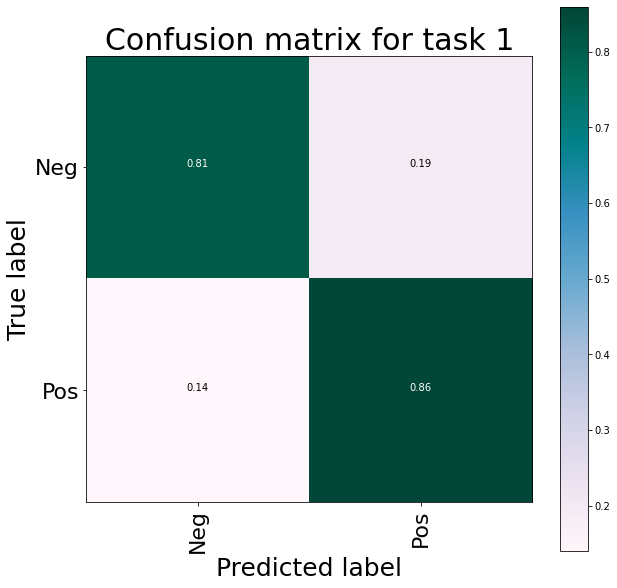

In [45]:
cnf_matrix = confusion_matrix(y_test, nb_predict)
names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
scores = cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]
conf_details = pd.DataFrame()
conf_details['TYPE'], conf_details['SCORES'] = names,scores
print(conf_details.to_string(index=False))
print()
print("----------VARIOUS METRICS--------------")
print(classification_report(y_test, nb_predict,target_names=['Neg','Pos']))
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=['Neg','Pos'], title="Confusion matrix for task 1")
plt.show()

# **_TASK 2_**

# Improvements and the reasoning behind it

### For task 2, I have decided to take an approach where I can compare two models of different types. 
### Since the dataset is extremely small (only 1382 entries), using a more complex classifier doesn't make sense because the data is insufficient to derive accurate predictions. Hence I discarded the use of Decision tree, Random Forest, Support Vector Machines and Neural Networks.

### Instead I have decided to make few changes to the initial approach in task 1, to have an expected improvement in task 2. I will talk about each change made separately:

1. ### _Firstly, I have decided to change the method of vectorization. In task 1, we used the Bag of Words technique to vectorize the reviews. This creates a vector of the counts of all the words in the vocabulary. But one of the drawbacks of this approach is that it is heavily biased in favour of most frequent words, and our model misses out on some of the important but less frequent features. [[2]](https://www.quora.com/What-is-the-difference-between-TfidfVectorizer-and-CountVectorizer-1)_
### _To solve this drawback, I have decided to use a TF-IDF Vectorizer. In TfidfVectorizer we consider overall document weightage of a word. It consists of 2 parts, TF (Term Frequency) multiplied with IDF (Inverse Document Frequency). TF is the number of times a term appears in a particular document. IDF is a measure of how common or rare a term is across the entire corpus of documents [[3]](https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/). Thus, TfidfVectorizer normalizes the counts generated via CountVectorizer, and are represented by relative frequencies identified as floating point numbers._


2. ### _Next, I also decided to implement the concept of n-grams in task 2. It's a way of verifying a sequence of text or speech for 'n' continuous words or sounds. This model aids in the prediction of the next item in a series. [[4]](https://doi.org/10.1016/j.eswa.2016.03.028) Specifically, I decided to include bi-grams (n=2) as well along with unigrams. For example, if the sentence was "Hello World, this is a computes program", the unigrams would be "Hello", "World", "this" .... and so on, while the bigrams would be "Hello World,", "World, this", "this is" ..... etc._ 
### _By including bi-grams as well, it helps increase the contextual understanding of the words and phrases, thus enabling the model to better understand the sentiment being conveyed in the text._

3. ### _Lastly, I decided to change the classifier, and implement a Logistic Regression classifier instead of a Naive Bayes. The main reason for this is because Naive Bayes Classifier is a generative model, while Logistic Regression is a discriminative model. A discriminative model uses conditional probability to generate predictions on unknown data and can be used to solve classification or regression problems. A generative model focuses on a dataset's distribution to yield a probability for a particular sample. [[5]](https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/) This means that Naive Bayes classifier makes the assumption that all the features are independent. Which is not the case, because the words have a relationship with each other semantically. The Logistic Regression Classifier, however, taken into consideration to an extent, the interdependability of the features with the target variable by assigning a probability score to each feature._ [[6]](http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf) [[7]](https://www.redalyc.org/pdf/925/92542543003.pdf)


In [46]:
# Cleaning the text a little furtther by removing all clesned tokens that are of length 1 or 2, 
# and storing them into a new column in the dataset

counters=0
start=time.time()
cleaned_text=[] # stores the processed reviews
for doc in nlp.pipe(dataset['Clean text'].to_list(),batch_size=100):
    # First all reviews are tokenized, made lowercase, and then stemmed
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc] 

    # Now all tokens rthat are stopwords or punctuations are removed from the review
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations and len(word)>2]

    # Making the list into a sentence which has been processed
    cleaned_text.append(' '.join(mytokens))

    counters+=1
    if counters%100==0:
        end=time.time()
        print(str(counters)+' reviews done and time taken is '+str(round(end-start,2))+' seconds')

dataset['Processed text']=cleaned_text # Storing the processed reviews in a new column

100 reviews done and time taken is 6.63 seconds
200 reviews done and time taken is 13.86 seconds
300 reviews done and time taken is 20.26 seconds
400 reviews done and time taken is 26.7 seconds
500 reviews done and time taken is 33.72 seconds
600 reviews done and time taken is 40.81 seconds
700 reviews done and time taken is 47.1 seconds
800 reviews done and time taken is 54.14 seconds
900 reviews done and time taken is 60.4 seconds
1000 reviews done and time taken is 66.23 seconds
1100 reviews done and time taken is 71.24 seconds
1200 reviews done and time taken is 77.65 seconds
1300 reviews done and time taken is 83.15 seconds


### Splitting the modified dataset into train and test sets, with train set containing 80% of the data and the test set having the remaining 20%

- `x_train`: All the reviews in the training set
- `x_test`: All the reviews in the test set
- `y_train`: All the binary sentiments in the training set
- `y_test`: All the binary sentiments in the training set

### **NOTE:**
I have set `test_size` parameter to 0.199 in order to get the train size as 1106 and test size as 276, as is specified in the lab requirements

In [47]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(dataset['Processed text'],dataset['Binary Sentiment'], test_size=0.199, shuffle=True, random_state=710)
print("TRAIN size:", len(x_train1))
print("TEST size:", len(x_test1))

TRAIN size: 1106
TEST size: 276


### Now, we create the TF-IDF Vectorizer, specifying the ngram range as (1,2), which means that both unigrams and bigrams will be taken into consideration. Then, similar to CountVectorizer, we use the `fit_transform` method to create the vectors for the training data reviews. Then, we use the same vectorizer to transform the test vectors, such that they have the same size as the train vectors. In this case, as seen below, we see that both train and test vectors have each vector of size `158169`. There is an exponential increase in the size from task 1 since we have included bigrams as well.

In [48]:
tv=TfidfVectorizer(ngram_range=(1,2),binary=True)
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train1)
#transformed test reviews
tv_test_reviews=tv.transform(x_test1)
print("TRAINING DATA SHAPE: ",tv_train_reviews.shape)
print("TEST DATA SHAPE: ",tv_test_reviews.shape)

TRAINING DATA SHAPE:  (1106, 158169)
TEST DATA SHAPE:  (276, 158169)


### Here, we define the new model, using the `LogisticRegression` classifier from sklearn. Following are the parameters used:
- ### `penalty`: L2 penalty indicates that the penalty will be calculated using L2 regularization
- ### `max_iter`: maximum iterations that the model can run to fit the data
- ### `C`: Inverse of regularization strength, the value was chosen on an estimate


In [49]:
from sklearn.linear_model import LogisticRegression

lr1=LogisticRegression(penalty='l2',max_iter=250,C=4,random_state=41)

#Fitting the model for train tfidf features
lr_tfidf=lr1.fit(tv_train_reviews,y_train1)
print(lr_tfidf)

LogisticRegression(C=4, max_iter=250, random_state=41)


In [55]:
#Predicting the model for test tfidf features
lr_tfidf_predict=lr1.predict(tv_test_reviews)
lr_tfidf_score=accuracy_score(y_test1,lr_tfidf_predict)
print("New model task 2 accuracy :",round(lr_tfidf_score,3)*100,"%")

New model task 2 accuracy : 86.2 %


           TYPE  SCORES
  True Negative     118
 False Negative      23
 False Positive      15
  True Positive     120

----------VARIOUS METRICS--------------
              precision    recall  f1-score   support

         Neg       0.89      0.84      0.86       141
         Pos       0.84      0.89      0.86       135

    accuracy                           0.86       276
   macro avg       0.86      0.86      0.86       276
weighted avg       0.86      0.86      0.86       276



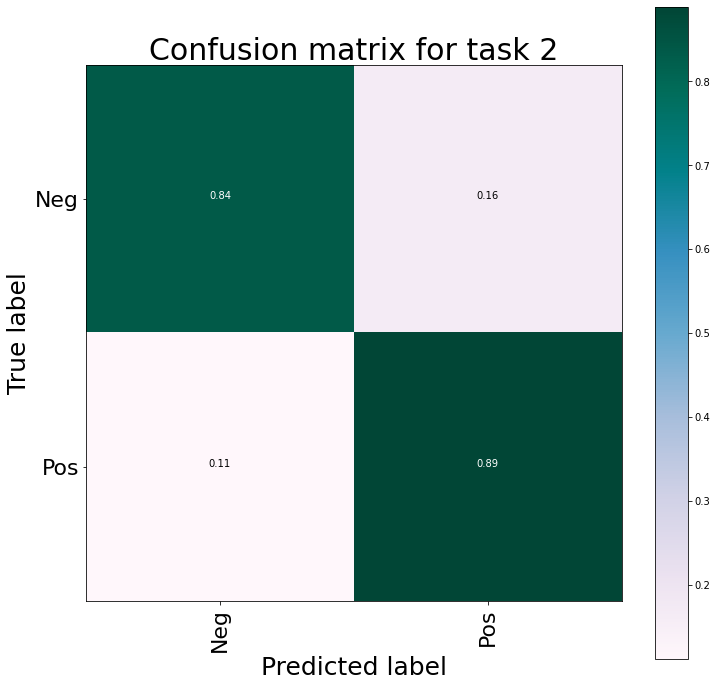

In [51]:
cnf_matrix = confusion_matrix(y_test1, lr_tfidf_predict)
names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
scores = cnf_matrix[0][0], cnf_matrix[0][1], cnf_matrix[1][0], cnf_matrix[1][1]
conf_details = pd.DataFrame()
conf_details['TYPE'], conf_details['SCORES'] = names,scores
print(conf_details.to_string(index=False))
print()
print("----------VARIOUS METRICS--------------")
print(classification_report(y_test1, lr_tfidf_predict,target_names=['Neg','Pos']))
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=['Neg','Pos'], title="Confusion matrix for task 2")
plt.show()

# Performance comparison between Task 1 and Task 2 Confusion Matrices

#### As we can see from both the confusion matrices and the accuracy scores, we see that there was a slight improvement in the performance of the model used in Task 2 as compared to Task 1. There is a small increase in the number of True Positives (116 to 120) and the number of True Negatives (114 to 118). This means that there was an improvement in the precision and recall as well, which is an indicator that the performance has improved. Also, the  accuracy increases from 83.3% to 86.2%. This shows that the changes made in task 2 from task 1 (Tfidf vectorizer, use of n-grams and change of classifier to Logistic Regression) has proved successful in achieving the expected improvement.

# References

[1] https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

[2] https://www.quora.com/What-is-the-difference-between-TfidfVectorizer-and-CountVectorizer-1

[3] https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/

[4] https://doi.org/10.1016/j.eswa.2016.03.028

[5] https://www.analyticsvidhya.com/blog/2021/07/deep-understanding-of-discriminative-and-generative-models-in-machine-learning/)

[6] http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf 

[7] https://www.redalyc.org/pdf/925/92542543003.pdf